<a href="https://colab.research.google.com/github/thoreau024/DATA-612-HW-Spencer-Flynn/blob/main/Spencer_Flynn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis
During our analysis we will be using data visualization to draw meaningful patterns and insights. We must also prepare the data for analysis and modeling by removing irregularities.

##Project Background

In order to have continuity of care, when a patient requests to be seen there is a 6hr lock that is put on the appointment where the system will wait for the patient's regular clinician to be available. If we knew that it was unlikely the clinician would complete the task within 6 hours, we would prefer to bypass the lock and reroute to another clinician in order improve the customer experience and prevent them from having to wait for no good reason. The goal of the ML models will be to predict the probability that the clinician will complete the task they have been locked to within 6 hours.

##Library Setup

In [ ]:
#Base Libraries
import datetime as datetime

#Scientific Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
! pip install distfit &> /dev/null
from distfit import distfit

#Visual Libraries
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno


#Helper Libraries
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##User Define Functions Used in Data Analysis

In [ ]:
def ones_and_zeros(data,features):
  for feature in features:
    data.loc[data[feature].notna(), feature] = 1
    data.loc[data[feature].isnull(), feature] = 0 

In [ ]:
def distribution_plots(c1, df):
  fig, axes = plt.subplots(1,2, figsize=(20, 4), sharey=False)
  #fig.suptitle()

  sns.histplot(ax=axes[0], x=c1, data=df, common_norm=True, kde=True)
  
  sns.boxplot(ax=axes[1], x=c1, data=df)

In [ ]:
def distplots3(x1, x2, x3, df):
  fig,axes = plt.subplots(3,2, figsize=(24, 15))
  ax1 = sns.histplot(ax=axes[0,0],x=x1, data=df, common_norm=True, kde=True, palette="cividis_r")
  #ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
 
  ax2 = sns.boxplot(ax=axes[0,1],x=x1, data=df, palette="cividis_r")
  #ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)

  ax3 = sns.histplot(ax=axes[1,0],x=x2, data=df, common_norm=True, kde=True, palette="cividis_r")
  #ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 30)

  ax4 = sns.boxplot(ax=axes[1,1],x=x2, data=df, palette="cividis_r")
  #ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 30)
 
  ax5 = sns.histplot(ax=axes[2,0],x=x3, data=df, common_norm=True, kde=True, palette="cividis_r")
  #ax5.set_xticklabels(ax5.get_xticklabels(),rotation = 30)

  ax6 = sns.boxplot(ax=axes[2,1],x=x3, data=df, palette="cividis_r")
  #ax6.set_xticklabels(ax6.get_xticklabels(),rotation = 30)

In [ ]:
def sns_heatmap(df):
  corr = df.corr()
  sns.set(rc = {'figure.figsize':(20,10)})
  sns.set_theme(style="white")
  mask = np.triu(np.ones_like(corr, dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
def sns_heatmap_a(df):
  corr = df.corr()
  sns.set(rc = {'figure.figsize':(20,10)})
  sns.set_theme(style="white")
  mask = np.triu(np.ones_like(corr, dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='.1f')

In [ ]:
def countplot4(x,h1,h2,h3,h4, df):
  fig,axes = plt.subplots(2,2, figsize=(24, 10), sharey=True)
  ax1 = sns.countplot(ax=axes[0,0], x=x, data=df, hue=h1, palette="cividis_r")
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
 
  ax2 = sns.countplot(ax=axes[0,1], x=x, data=df, hue=h2, palette="cividis_r")
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)

  ax3 = sns.countplot(ax=axes[1,0], x=x, data=df, hue=h3, palette="cividis_r")
  ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 30)

  ax4 = sns.countplot(ax=axes[1,1], x=x, data=df, hue=h4, palette="cividis_r")
  ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 30)

In [ ]:
def countplot4t(x1,x2,x3,x4,h):
  fig,axes = plt.subplots(2,2, figsize=(24, 14), sharey=True)
  ax1 = sns.countplot(ax=axes[0,0], x=x1, data=train, hue=h, palette="cividis_r")
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
 
  ax2 = sns.countplot(ax=axes[0,1], x=x2, data=train, hue=h, palette="cividis_r")
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)

  ax3 = sns.countplot(ax=axes[1,0], x=x3, data=train, hue=h, palette="cividis_r")
  ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 30)

  ax4 = sns.countplot(ax=axes[1,1], x=x4, data=train, hue=h, palette="cividis_r")
  ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 30)

In [ ]:
def countplot3(x1, x2, x3, df, h):
  fig,axes = plt.subplots(1,3, figsize=(24, 6), sharey=True)
  ax1 = sns.countplot(ax=axes[0], x=x1, data=df, hue=h, palette="cividis_r")
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
 
  ax2 = sns.countplot(ax=axes[1], x=x2, data=df, hue=h, palette="cividis_r")
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)

  ax3 = sns.countplot(ax=axes[2], x=x3, data=df, hue=h, palette="cividis_r")
  ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 30)

In [ ]:
def stripplot2(x1, x2, df, h):
  fig,axes = plt.subplots(1,2, figsize=(15, 4), sharey=True)
  ax1 = sns.stripplot(ax=axes[0],x=x1,y=h, data=df,palette="crest")
   
  ax2 = sns.stripplot(ax=axes[1],x=x2,y=h, data=df,palette="crest")

In [ ]:
def countplot(name,h):
  ax = sns.countplot(x=name, hue=h, data=train,palette="crest")
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [ ]:
def countplot2(x1,x2,h):
  fig,axes = plt.subplots(1,2, figsize=(20, 4), sharey=True)
  ax1 = sns.countplot(ax=axes[0],x=x1,hue=h, data=train,palette="crest")
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
  ax2 = sns.countplot(ax=axes[1],x=x2,hue=h, data=train,palette="crest")
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)

In [ ]:
def kdeplot4(x,h1,h2,h3,h4,strt,stop):
  fig,axes = plt.subplots(2,2, figsize=(24, 10), sharey=True)
  
  ax1 = sns.kdeplot(ax=axes[0,0], data=train, x=x, hue=h1, common_norm=False, multiple="fill",  palette="crest", alpha = 1, clip=(strt,stop))
  ax2 = sns.kdeplot(ax=axes[0,1], data=train, x=x, hue=h2, common_norm=False, multiple="fill",  palette="crest", alpha = 1, clip=(strt,stop))
  ax3 = sns.kdeplot(ax=axes[1,0], data=train, x=x, hue=h3, common_norm=False, multiple="fill",  palette="crest", alpha = 1, clip=(strt,stop))
  ax4 = sns.kdeplot(ax=axes[1,1], data=train, x=x, hue=h4, common_norm=False, multiple="fill",  palette="crest", alpha = 1, clip=(strt,stop))

In [ ]:
def scatterplot4(x,y1,y2,y3,y4):
  fig,axes = plt.subplots(2,2, figsize=(24, 10), sharey=False)
  sns.scatterplot(ax=axes[0,0], x=x, y=y1,data=train)
  sns.scatterplot(ax=axes[0,1], x=x, y=y2,data=train)
  sns.scatterplot(ax=axes[1,0], x=x, y=y3,data=train)
  sns.scatterplot(ax=axes[1,1], x=x, y=y4,data=train)

##Preliminary Data Preparation

To begin, I will load in my full dataset and create my target feature.

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/capstone/capstone_dataset.csv', low_memory=False)

###Target Feature

The target feature used in the analysis is a binary feature that differentiates tasks where clinicians that were locked to a task are the ones who completed it within the 6 hour lock. 

•The two levels were formed by segmenting records where the locked to clinician completed the task and the elapsed time was under 6 hours. 

•The target feature in the data set is the number 1, and is just called “target”.

In [ ]:
#df['target'] = 0
#idx = df[(df['hours_locked_to_complete'] < 6) & (df['locked_to_clinician_id'] == df['completed_by_user_id'])].index
#df.loc[idx,'target'] = 1

In [ ]:
#DUPLICATES
#df.drop_duplicates(inplace=True)

###Split Data into Training and Test Sets

Before doing any analysis or preprocessing I split the data using 70% for training and 30% for testing.

In [ ]:
#train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True) 
#shuffling the data to ensure the random selection of data for each set.

To prevent any information from the testing set being used in my analysis or model development, it will be held until model development is completed and I am ready to test my final model.

In [ ]:
#df.to_csv('/content/drive/MyDrive/capstone/capstone_dataset.csv')
#train.to_csv('/content/drive/MyDrive/capstone/capstone_training_dataset.csv')
#test.to_csv('/content/drive/MyDrive/capstone/capstone_testing_dataset.csv')

##Load in Training Set

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/capstone/capstone_training_dataset.csv', low_memory=False)
train.drop('Unnamed: 0',1,inplace=True) #unnamed column added when saving to google drive and reloading into colab

##Overview of Data

Starting with basic exploration of the dataset to get a feel for size, datatypes, and a general idea of how it looks.

In [ ]:
train.head()

,task_id,task_category_code,locked_to_clinician_id,date_created,day_created,hour_created,priority,date_completed,day_completed,hour_completed,hours_locked_to_complete,completed_by_user_id,user_action_code,user_is_active,story_type_code,workflow_code,productive_tasks_per_active_hour,productive_tasks,active_hours,training_type,active_in_emr,sex,age,spanish_treating,english_treating,visits_signed,date_last_book_created,closure_percentage,latest_book_score,clinician_pay_wave,clinician_type,training_field,target
0,4385191,clinician_to_review,rFCwSGRO,2021-11-04,5,1,5,2021-11-04,5,20,18.600000,Js1OVyNatAQ,patient_send_message,True,visit,async_visit,71.168114,64416.0,905.12,OTHER,active,Male,39,NaN,english_treating_clinician,6638.0,2021-12-21,92.0,92.0,NP Tiered Pay,NP,"[""NP-Adult Gerontology"",""NP-Acute Care""]",0
1,4803538,complete_sync_appointment,wHDil6uy0,2021-12-20,2,20,1,2021-12-20,2,20,0.066667,wHDil6uy0,patient_join_appointment,True,visit,async_visit,88.829147,48682.0,548.04,OTHER,active,Male,35,NaN,english_treating_clinician,3308.0,2022-01-06,49.0,89.0,No Hourly Rate,MD,"[""Emergency Medicine""]",1
2,4496640,clinician_initial_review,r7XyjaM8,2021-11-14,1,22,5,2021-11-14,1,23,0.700000,r7XyjaM8,patient_submit_visit,True,visit,async_visit,89.658076,152577.0,1701.77,OTHER,inactive,Male,34,NaN,NaN,16219.0,2021-11-03,NaN,92.0,Physician Tiered Pay,MD,"[""Dermatology""]",1
3,4855728,clinician_to_review,GcY4C2zT,2021-12-27,2,15,5,2021-12-27,2,15,0.116667,GcY4C2zT,patient_send_message,True,visit,async_visit,112.770664,106713.0,946.28,FAMILY,active,Female,37,NaN,english_treating_clinician,9898.0,2022-01-05,95.0,97.0,NP Tiered Pay,NP,"[""NP-Family""]",1
4,4205729,clinician_initial_review,Wls7Zv4x,2021-10-14,5,19,2,2021-10-14,5,19,0.433333,Wls7Zv4x,patient_schedule_appointment,True,visit,sync_visit_v2,112.760199,185831.0,1648.02,FAMILY,active,Female,37,NaN,english_treating_clinician,17755.0,2022-01-05,91.0,75.0,NP Tiered Pay,NP,"[""NP-Family""]",1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311614 entries, 0 to 311613
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   task_id                           311614 non-null  int64  
 1   task_category_code                311614 non-null  object 
 2   locked_to_clinician_id            311614 non-null  object 
 3   date_created                      311614 non-null  object 
 4   day_created                       311614 non-null  int64  
 5   hour_created                      311614 non-null  int64  
 6   priority                          311614 non-null  int64  
 7   date_completed                    311614 non-null  object 
 8   day_completed                     311614 non-null  int64  
 9   hour_completed                    311614 non-null  int64  
 10  hours_locked_to_complete          311614 non-null  float64
 11  completed_by_user_id              311614 non-null  o

###Initial Insights

* Incorrect Data Types

  There are three common types of data (categorical, numeric and datetime) which have different EDA procedures for each. Datetime features need to be converted to the correct type.

* Missing Values

  Real-world data often has a lot of missing values. The cause of missing values are numerous, but the handling of missing data is very important during preprocessing as many machine learning algorithms do not support missing values.

From this information we can already see that some features won't be relevant in our analysis. There are so many features to analyse that it may be better to concentrate on the ones which can give real insights.

Additionally, the data being fed into the final model will not have information surrounding task completion (Completed by Clinician ID, Completed Date/Day/Hour, Elapsed Hours).

Before removing these features we will look at distributions and see if we can gain any useful information.

##Continuous Distributions

###Productive Tasks and Active Hours

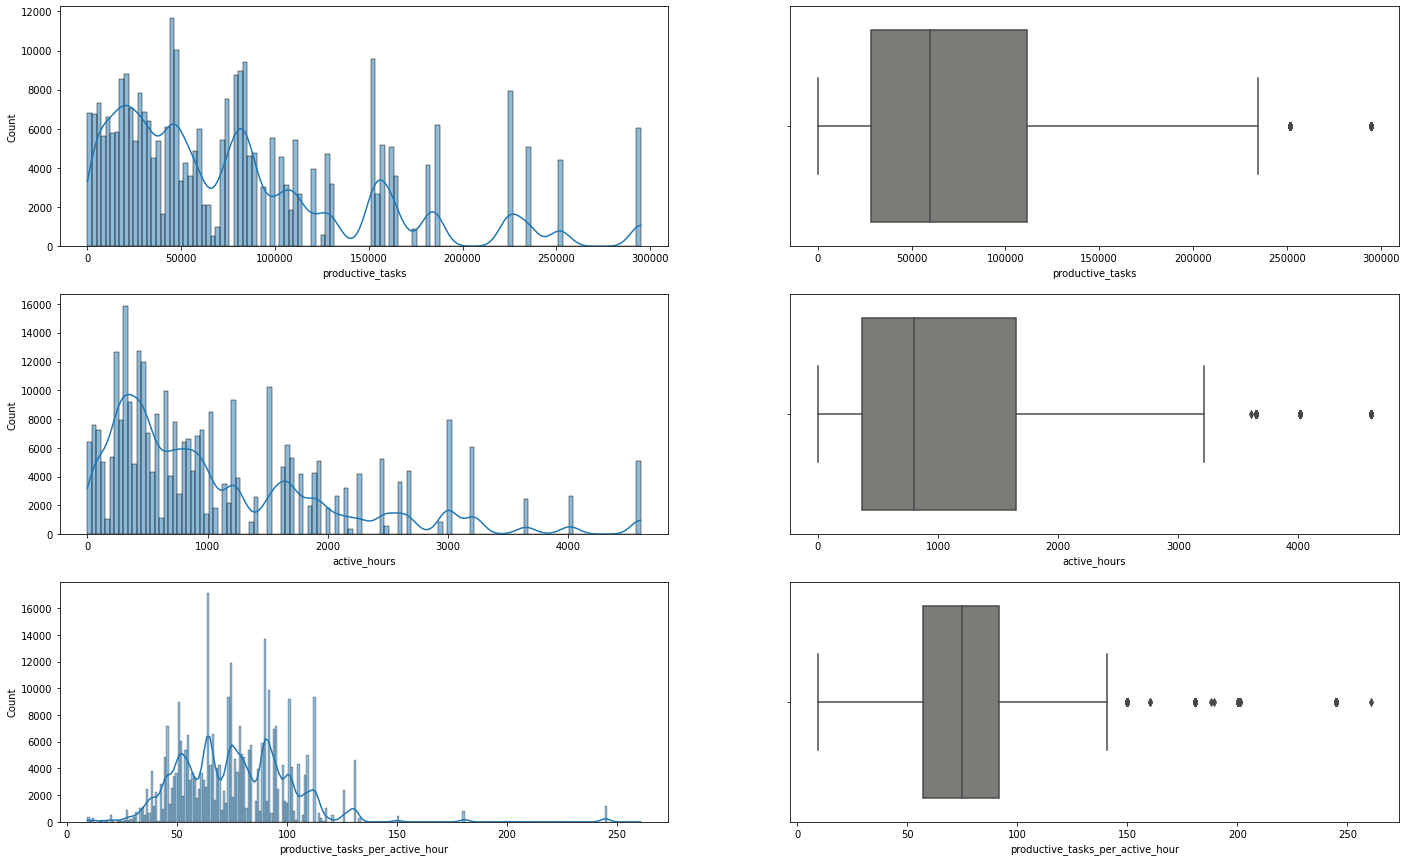

In [ ]:
distplots3('productive_tasks','active_hours','productive_tasks_per_active_hour', train)

###Visits Signed, Closure Percentage, and Latest Book Score

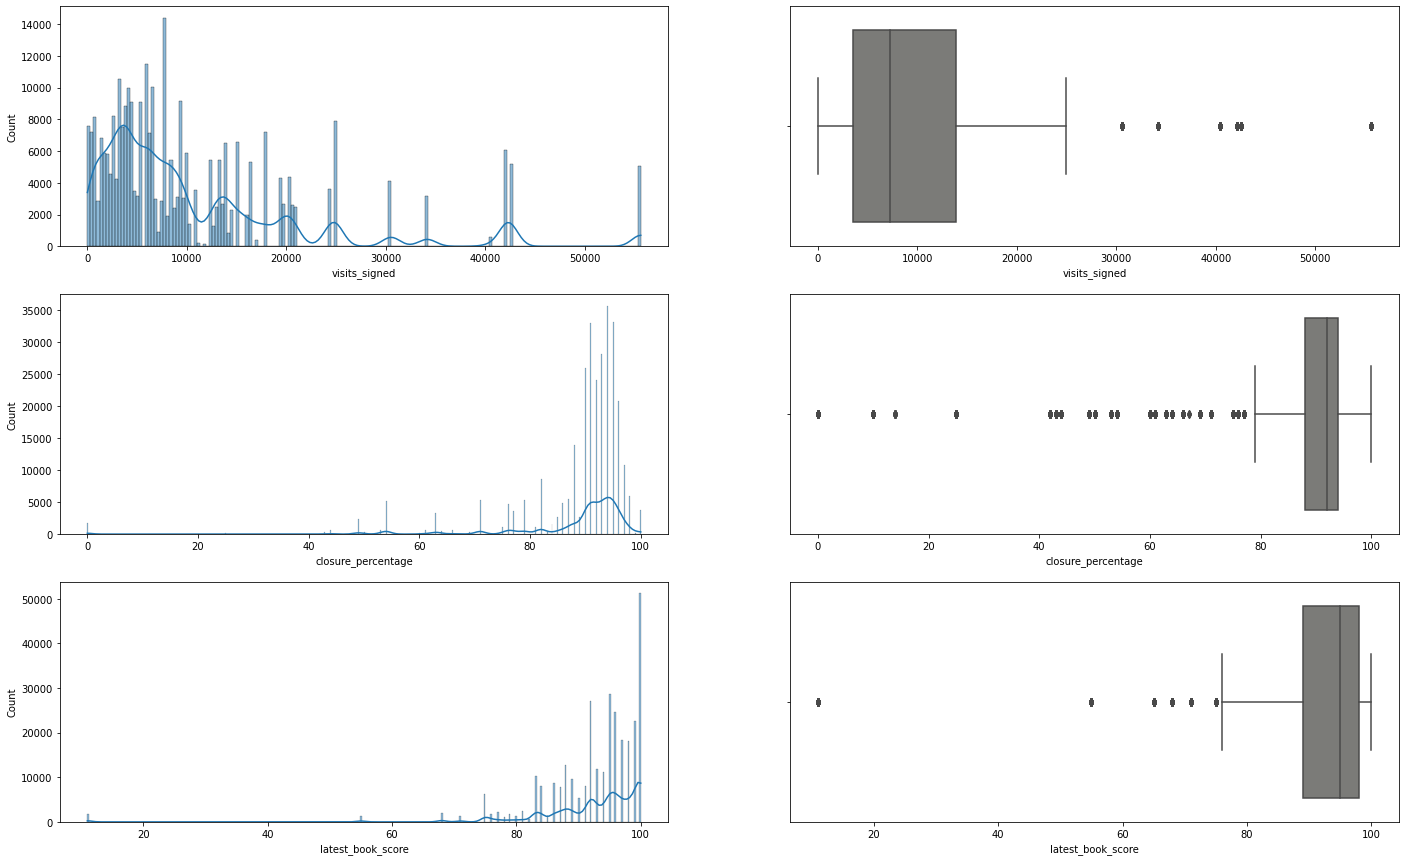

In [ ]:
distplots3('visits_signed','closure_percentage','latest_book_score', train)

We can see that all of the continuous features are skewed and have many outliers.

##Discrete, Ordinal, and Categorical Distributions

###Age
We see a small amount of outliers for age, but the data is slightly skewed.

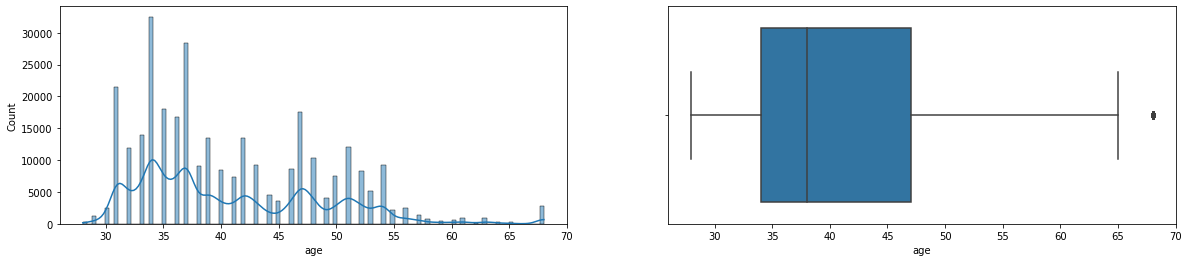

In [ ]:
distribution_plots('age',train)

###Priority
The majority of tasks being locked to clinicians are priority 5.

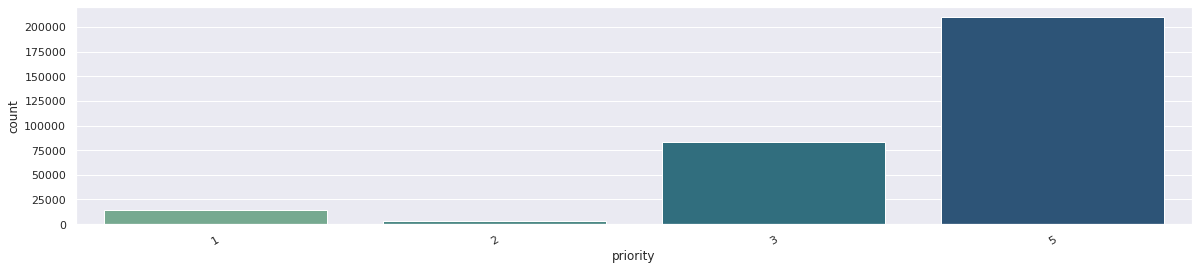

In [ ]:
sns.set(rc = {'figure.figsize':(20,4)})
countplot('priority',None)

###Created Day of Week and Hour of Day
We can see that there are more tasks being created during the week and between 1pm to 10pm UTC.

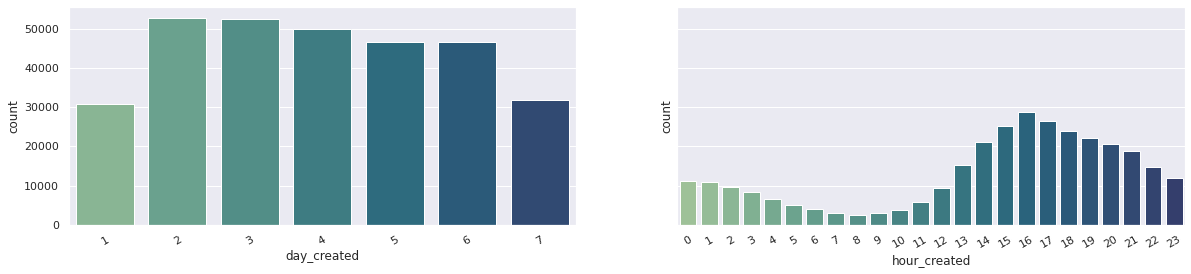

In [ ]:
countplot2('day_created','hour_created',None)

#####( Monday(2) - Friday(6) )

###Clinician Sex
There are 2x as many female clinicians.

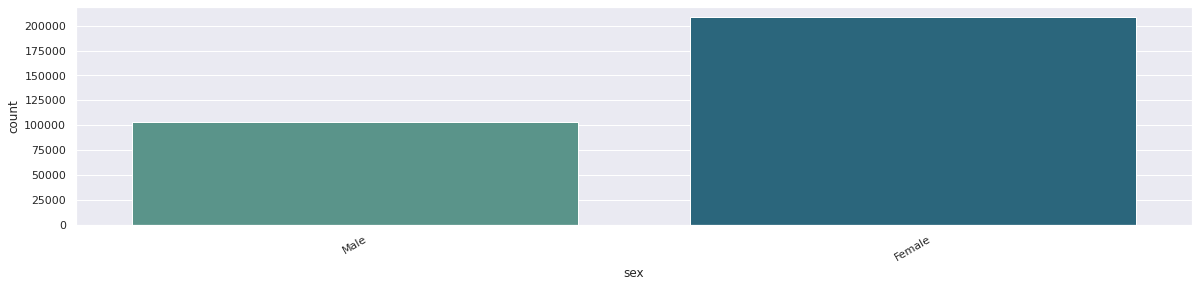

In [ ]:
sns.set(rc = {'figure.figsize':(20,4)})
countplot('sex',None)

###Clinician Pay Wave, Clinician Type, Clinician Training Type
The most common observations for clinician pay wave, clinician type, and clinician training type are 'NP Tiered Pay', 'NP', and 'FAMILY' respectively. We also see that there are very few therapists and PA's.

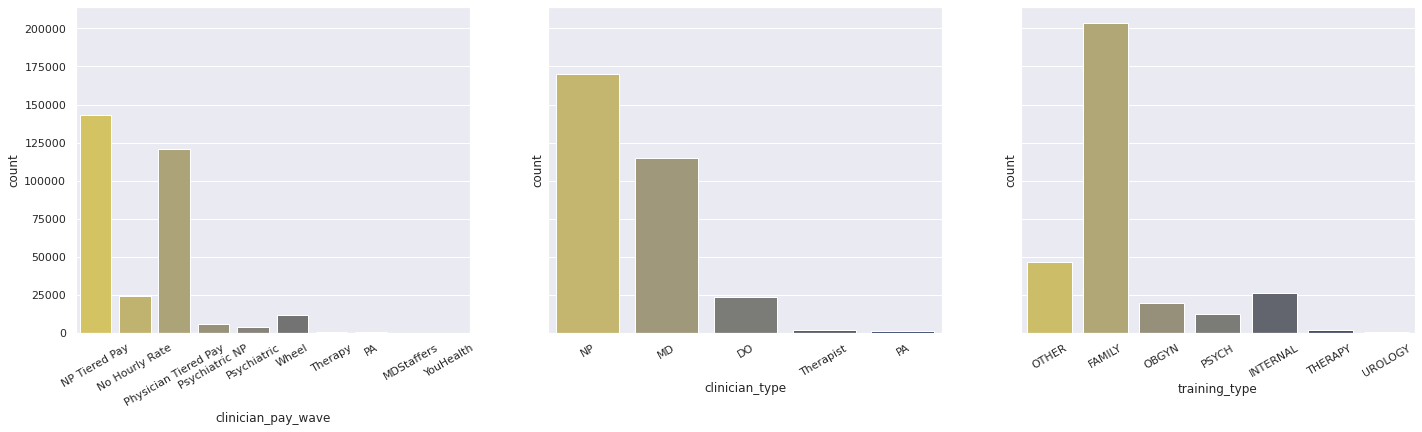

In [ ]:
countplot3('clinician_pay_wave','clinician_type', 'training_type',train,None)

###Task Category Code, Workflow Code
The most common value for task category code is clinician to review. Both graphs show that majority of appoinments are synch visits. 

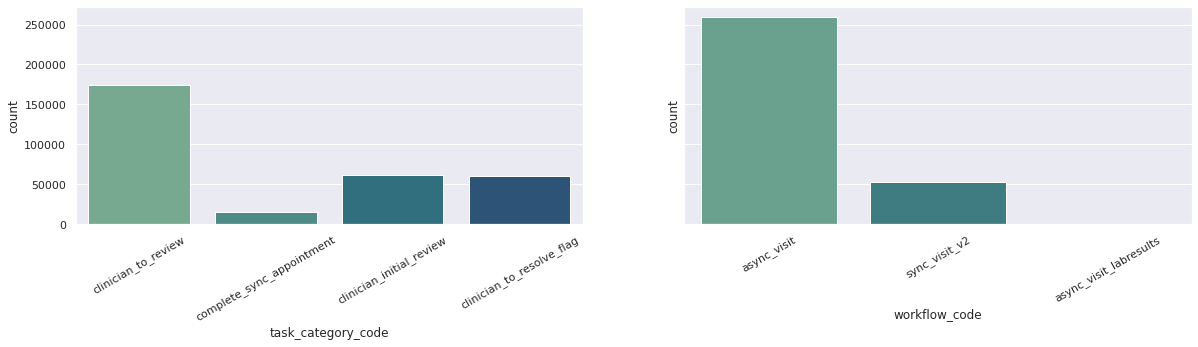

In [ ]:
countplot2('task_category_code','workflow_code',None)

###User Action Code
The most common action that is creating tasks for clinicians is when a patient sends a message. 

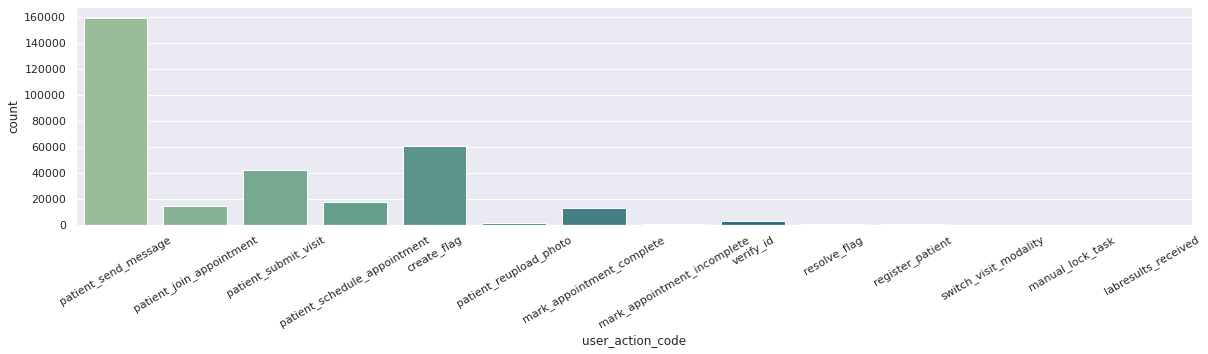

In [ ]:
countplot('user_action_code',None)

###Active in EMR and User is Active
Almost all clinicians and users creating tasks are counted as active.

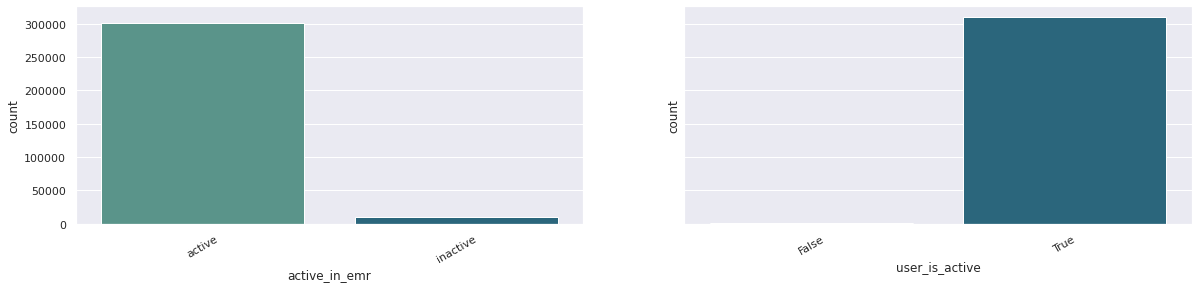

In [ ]:
countplot2('active_in_emr','user_is_active',None)

##Missing Values

###Evaluating extend of missing data.

In [ ]:
nulls = train.columns[train.isnull().any()]
train[nulls].isnull().sum()

user_is_active                           2
story_type_code                          2
workflow_code                            2
productive_tasks_per_active_hour         1
productive_tasks                         1
active_hours                             1
spanish_treating                    292535
english_treating                      6452
visits_signed                         1807
date_last_book_created                 981
closure_percentage                   12309
latest_book_score                     1848
dtype: int64

We can see that the majority of missing values are for the 'spanish_treating' feature. We should actually convert this feature into a binary one, where non-null values indicate the clinican treats spanish treating patients. The same is true for the 'english_treating' feature.

In [ ]:
ones_and_zeros(train,['spanish_treating','english_treating'])
#converting to numerical datatype
train[['spanish_treating','english_treating']] = train[['spanish_treating','english_treating']].astype('int64')

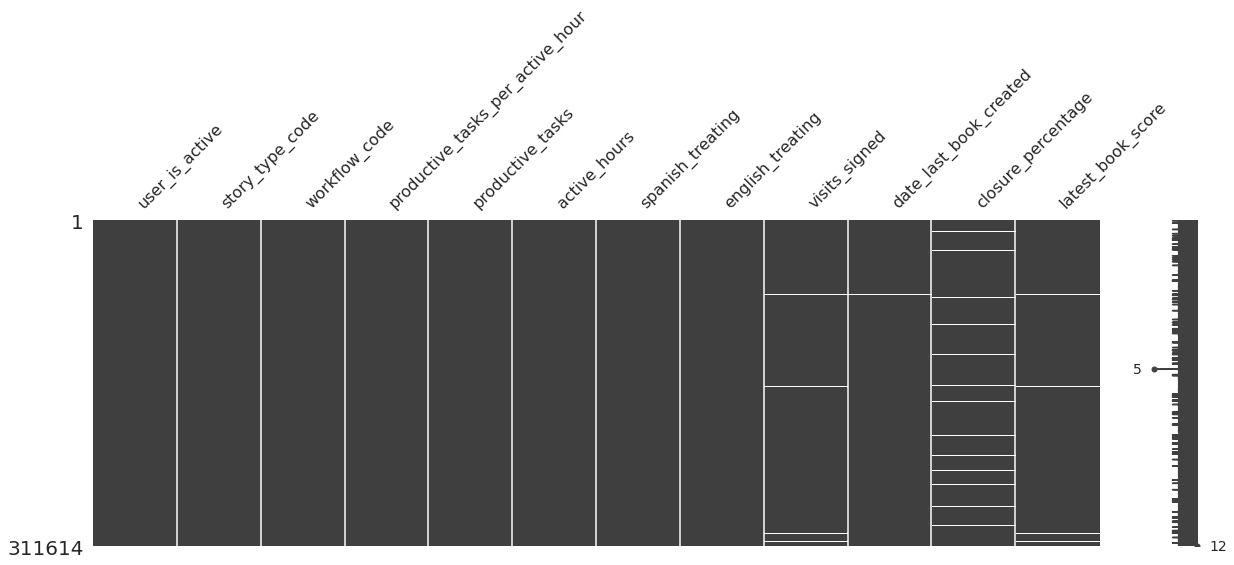

In [ ]:
msno.matrix(train[nulls], figsize =(20,6))

The below heatmap is used to identify correlations of the nullity between each of the different columns. We can easily pick out groups of features from this visualization.

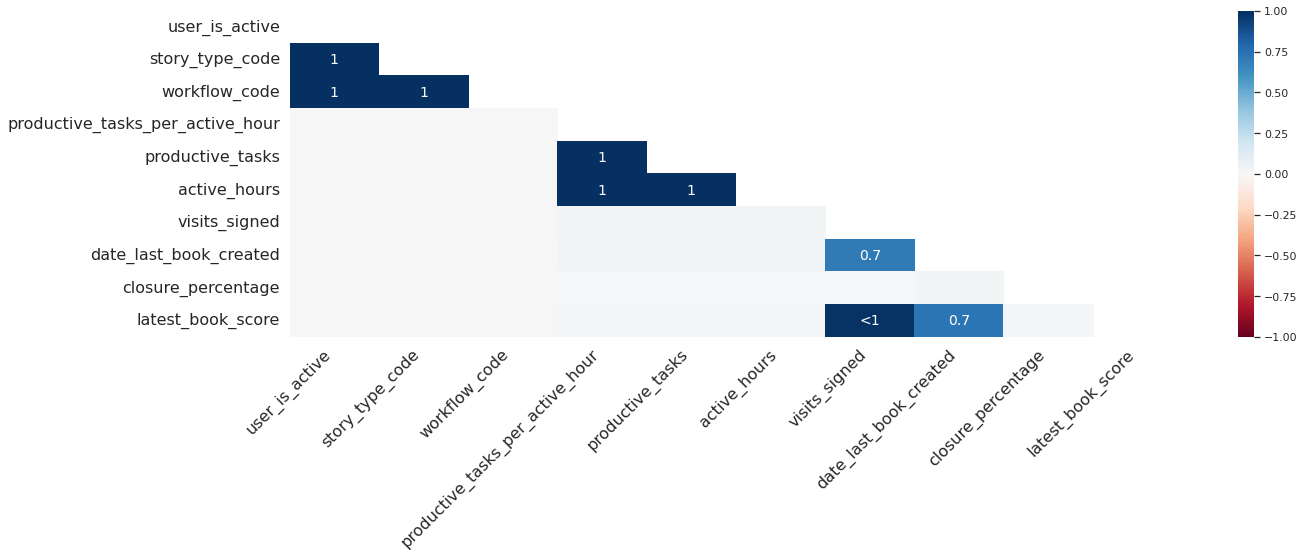

In [ ]:
msno.heatmap(train[nulls], figsize =(20,6))

###Story Type Code, Workflow Code, and User is Active

In [ ]:
train[(train['workflow_code'].isnull())|(train['story_type_code'].isnull())|(train['user_is_active'].isnull())]

,task_id,task_category_code,locked_to_clinician_id,date_created,day_created,hour_created,priority,date_completed,day_completed,hour_completed,hours_locked_to_complete,completed_by_user_id,user_action_code,user_is_active,story_type_code,workflow_code,productive_tasks_per_active_hour,productive_tasks,active_hours,training_type,active_in_emr,sex,age,spanish_treating,english_treating,visits_signed,date_last_book_created,closure_percentage,latest_book_score,clinician_pay_wave,clinician_type,training_field,target
246240,4823096,clinician_to_resolve_flag,wHDil6uy0,2021-12-22,4,22,3,2021-12-22,4,22,0.700000,wHDil6uy0,manual_lock_task,NaN,NaN,NaN,88.829147,48682.0,548.04,OTHER,active,Male,35,0,1,3308.0,2022-01-06,49.0,89.0,No Hourly Rate,MD,"[""Emergency Medicine""]",1
282531,4723249,clinician_to_resolve_flag,LIZo5AIq,2021-12-10,6,21,3,2021-12-11,7,2,4.616667,Hm70nsau820,manual_lock_task,NaN,NaN,NaN,61.337749,131583.0,2145.22,FAMILY,active,Male,52,0,1,34165.0,2021-12-15,63.0,98.0,No Hourly Rate,MD,"[""Family Medicine""]",0


All of these featues have only 2 null values which correspond to when User Action Code is 'manual_lock_task'. We can also see that aside from these 2 missing values, the 'story_type_code' feature has only one possible value.

In [ ]:
train['story_type_code'].value_counts()

visit    311612
Name: story_type_code, dtype: int64

###Productive Tasks, Active Hours, and Productive Tasks Per Active Hour

In [ ]:
train[train['active_hours'].isnull()]

,task_id,task_category_code,locked_to_clinician_id,date_created,day_created,hour_created,priority,date_completed,day_completed,hour_completed,hours_locked_to_complete,completed_by_user_id,user_action_code,user_is_active,story_type_code,workflow_code,productive_tasks_per_active_hour,productive_tasks,active_hours,training_type,active_in_emr,sex,age,spanish_treating,english_treating,visits_signed,date_last_book_created,closure_percentage,latest_book_score,clinician_pay_wave,clinician_type,training_field,target
142480,4571227,clinician_initial_review,LX9drWqfVI4,2021-11-23,3,0,3,2021-11-23,3,4,3.533333,agHFfCAx,patient_schedule_appointment,True,visit,sync_visit_v2,NaN,NaN,NaN,THERAPY,active,Male,47,0,1,NaN,NaN,NaN,NaN,Therapy,Therapist,"[""Therapy""]",0


All three features have only 1 missing value which are all found at the same index and tied to a single clinician. That only appears once in the dataset.

In [ ]:
train[train['locked_to_clinician_id']=='LX9drWqfVI4']

,task_id,task_category_code,locked_to_clinician_id,date_created,day_created,hour_created,priority,date_completed,day_completed,hour_completed,hours_locked_to_complete,completed_by_user_id,user_action_code,user_is_active,story_type_code,workflow_code,productive_tasks_per_active_hour,productive_tasks,active_hours,training_type,active_in_emr,sex,age,spanish_treating,english_treating,visits_signed,date_last_book_created,closure_percentage,latest_book_score,clinician_pay_wave,clinician_type,training_field,target
142480,4571227,clinician_initial_review,LX9drWqfVI4,2021-11-23,3,0,3,2021-11-23,3,4,3.533333,agHFfCAx,patient_schedule_appointment,True,visit,sync_visit_v2,NaN,NaN,NaN,THERAPY,active,Male,47,0,1,NaN,NaN,NaN,NaN,Therapy,Therapist,"[""Therapy""]",0


###Visits Signed and Latest Book Score

We can see that *nearly* all instances of null values for these two features correspond to the same index. 

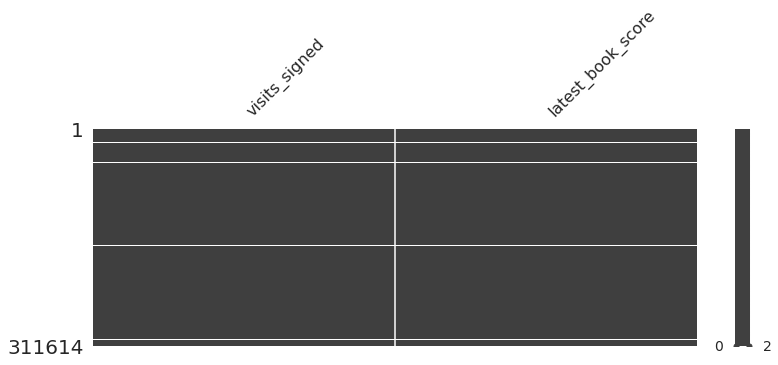

In [ ]:
msno.matrix(train[['visits_signed','latest_book_score']], figsize =(12,4))

We can also see that the the majority of null values are connected to Therapists.

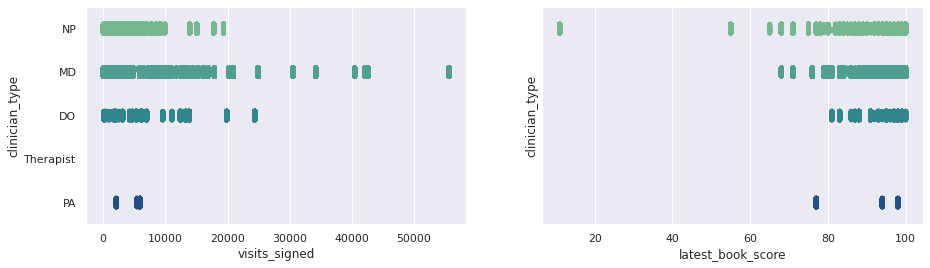

In [ ]:
stripplot2('visits_signed','latest_book_score', train,'clinician_type')

###Closure Percentage

From the distribution plots we know that the closure_percentage data is skewed. There are several smaller data points that act as outliers. Since the data is skewed, it is best to use the median imputation in which the missing values are replaced with the median value of the feature column.

###Delete Rows with Missing Values:

Missing values can be handled by deleting the rows having null values. This works well since the percentage of missing values represented in these rows is very small.

In [ ]:
idx = train[train['user_action_code']=='manual_lock_task'].index
train.drop(idx, inplace=True)

idx = train[train['locked_to_clinician_id']=='LX9drWqfVI4'].index
train.drop(idx, inplace=True)

###Delete Columns with Missing Values:
If columns have more than half of the rows as null, or if we have already determined the column will not be used in the model, then the entire column can be dropped.

In [ ]:
train.drop('visits_signed',1,inplace=True)
train.drop('latest_book_score',1,inplace=True)
train.drop('story_type_code',1,inplace=True)
train.drop('date_last_book_created',1,inplace=True)

###Impute Missing Values:

This method can prevent the loss of data compared to deleting missing values. Replacing with the median is a statistical approach to handle the missing values. 

Rather than imputing with the median of the entire column, we will impute with the median of closure percentage with grouped values from other columns. This allows us to split data in separate groups to perform computations with statistically better results. We will use discrete columns that describe certain characteristics of clinicians and have no missing values for grouping.

In [ ]:
train['closure_percentage'] = train.groupby(['active_in_emr','sex','user_is_active'])['closure_percentage'].transform(lambda x: x.fillna(x.median()))

##Feature Aggregation and Transformation


###Workflow Code
Aggregating feature into Async Visits (=1) and Synch Visits (=0) and encoding as binary:

In [ ]:
idx = train[(train['workflow_code']=='async_visit')|(train['workflow_code']=='async_visit_labresults')].index
train['workflow_code'] = 0
train.loc[idx,'workflow_code'] = 1
train['workflow_code'] = train['workflow_code'].astype('int64')


###Created Hour and Day Features

The data in these features is inherently cyclical. In order to help let our machine learning models know, this we will create two new features deriving sine and cosine transformations of the features.

In [ ]:
hour_created_float = train['hour_created'].apply(lambda x: float(x))
train['hr_created_x'] =hour_created_float.apply(lambda x: np.sin((2*np.pi*x)/24))
train['hr_created_y'] = hour_created_float.apply(lambda x: np.cos((2*np.pi*x)/24))

day_created_float = train['day_created'].apply(lambda x: float(x))
train['day_created_x'] =day_created_float.apply(lambda x: np.sin((2*np.pi*x)/7))
train['day_created_y'] = day_created_float.apply(lambda x: np.cos((2*np.pi*x)/7))

A convienent way to show what we just did is to plot the feature transformations. The distance between two points corresponds to the difference in time as we would expect from a 24-hour cycle.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


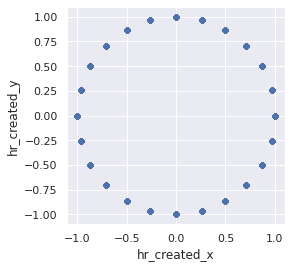

In [ ]:
train.plot.scatter('hr_created_x','hr_created_y').set_aspect('equal');

##Covariation

###Continuous Features

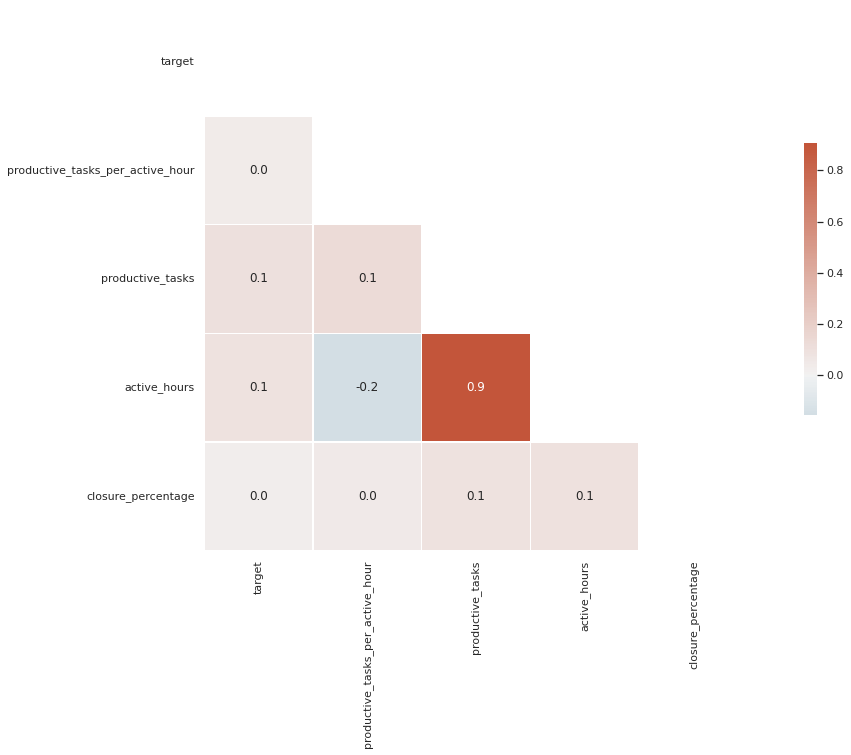

In [ ]:
sns_heatmap_a(train[['target','productive_tasks_per_active_hour','productive_tasks','active_hours','closure_percentage']]);

We can see that there is a positive correlation between active hours and productive tasks. This makes sense as the more hours a clinician is active the more likely they are to complete productive tasks.  There is a negative correlation between active hours and productive tasks per active hour, which is expected since productive tasks per active hour is a ratio that has active hours as the denominator. 

####Age
Age has a small positive correlation with active hours and productive tasks. 

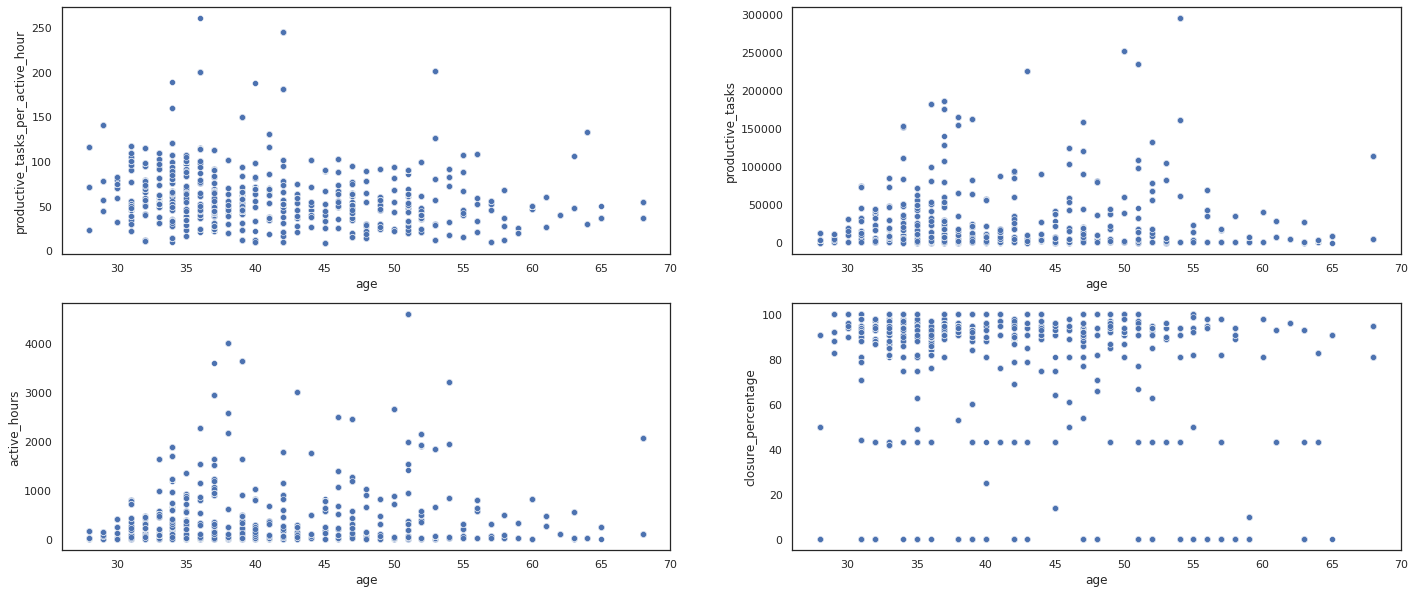

In [ ]:
scatterplot4('age','productive_tasks_per_active_hour','productive_tasks','active_hours','closure_percentage')

Majority of Therpaists are female and majority of PA's are male.

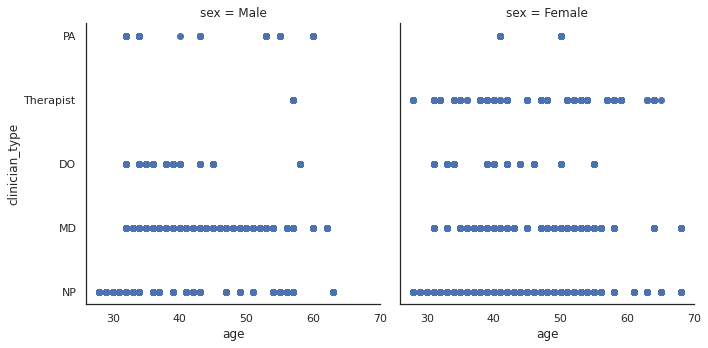

In [ ]:
g = sns.FacetGrid(train, col='sex', height=5)
g.map(plt.scatter, "age", "clinician_type")

###Categorical Features

####Hour of Day and Day of Week Task Created

From the following countplots it can be noted that tasks created between 1pm and 9pm UTC are much more likely to be completed by the locked to clinician within 6 hours. The same can be said for tasks that are created Monday through Friday.

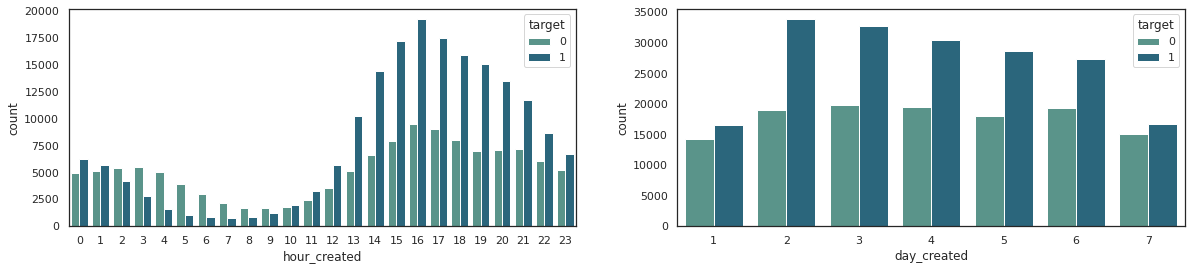

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(20, 4), sharey=False)
sns.countplot(ax=axes[0],x='hour_created',hue='target', data=train,palette="crest")
sns.countplot(ax=axes[1],x='day_created',hue='target', data=train,palette="crest")

We can see that most of the distributions remain constant for any given hour the task is created, except for priority. From the kde plot we can see that between 2am and 8am UTC there is an increase of tasks with priority 3.

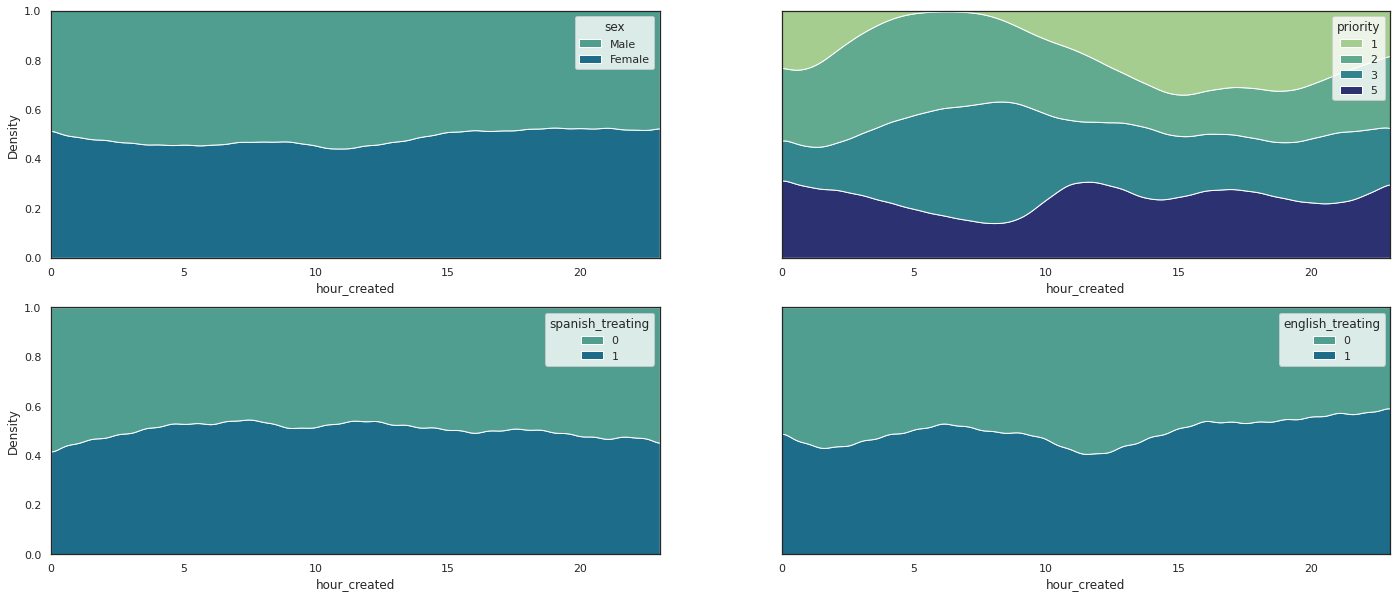

In [ ]:
kdeplot4('hour_created', 'sex', 'priority', 'spanish_treating', 'english_treating',0,23)

If we look at user action codes that correspond to priority level 3, we see that this peak is mostly due to users (most likely customer experience agents) creating flags for clinicians to review. 

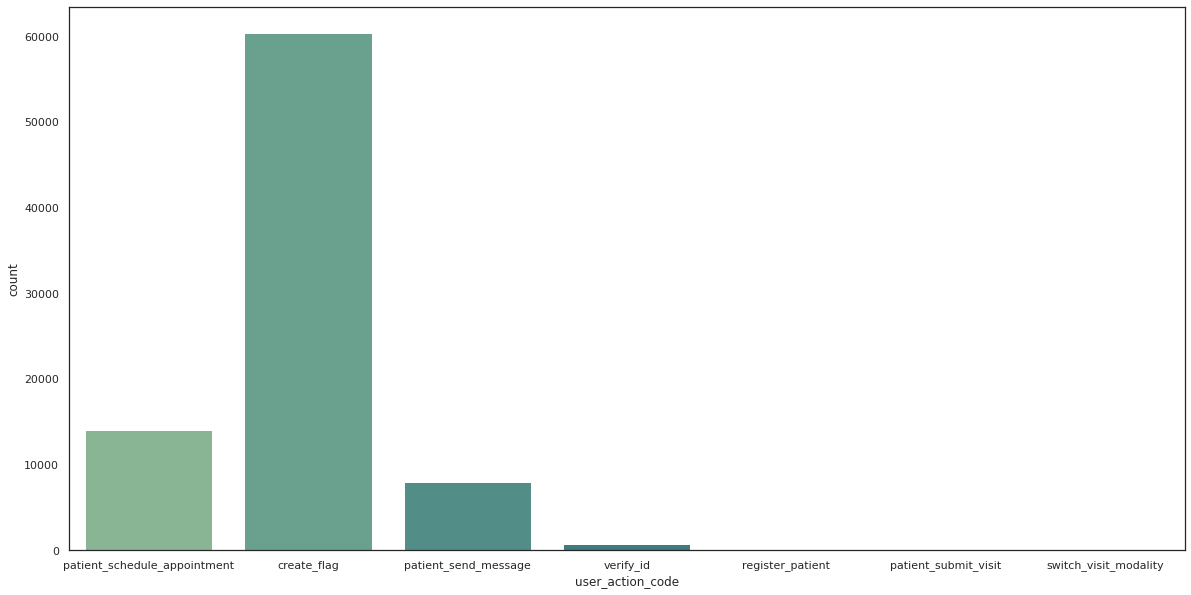

In [ ]:
sns.countplot(x='user_action_code', data=train[train['priority']==3],palette="crest")

This trend can also be observed in the kde plot for task category code, where the peak is tied to clinician to resolve flag. We can also note that around 10am UTC there is an increase in tasks that are locked to clinicians with training type of Urology.

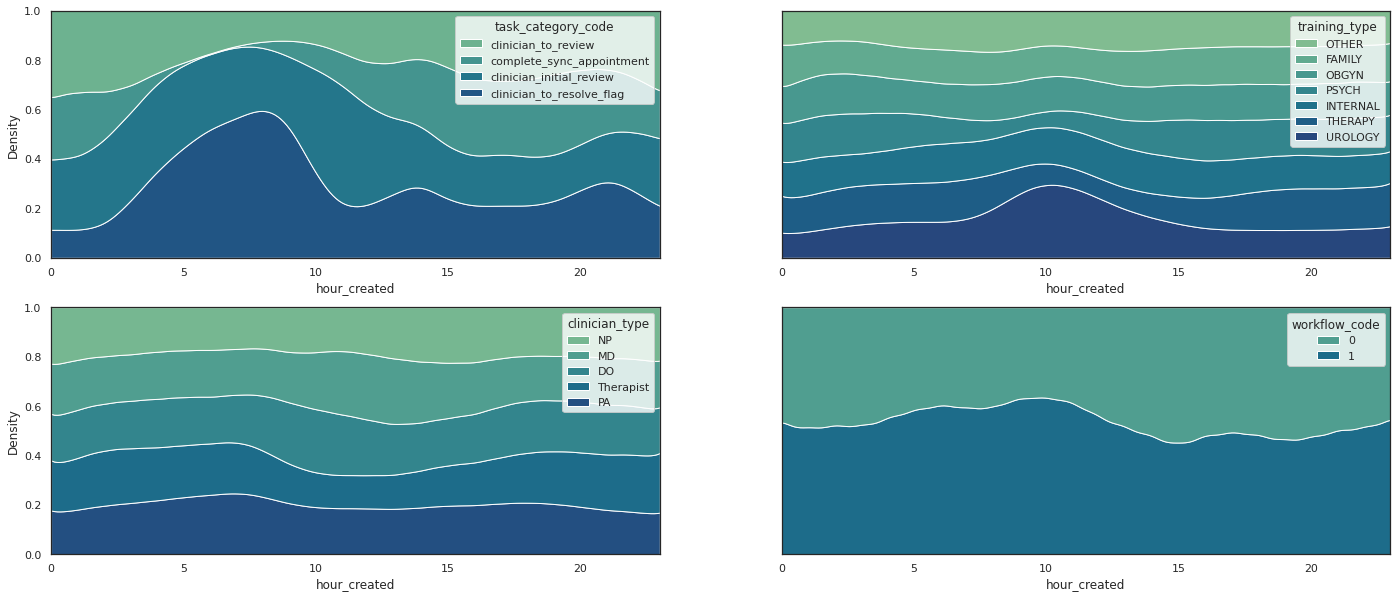

In [ ]:
kdeplot4('hour_created','task_category_code','training_type','clinician_type','workflow_code',0,23)

Distributions for all of the follow features do change by day based on the increase in tasks being created, but the proportions generally have the same distribution of any day of the week.

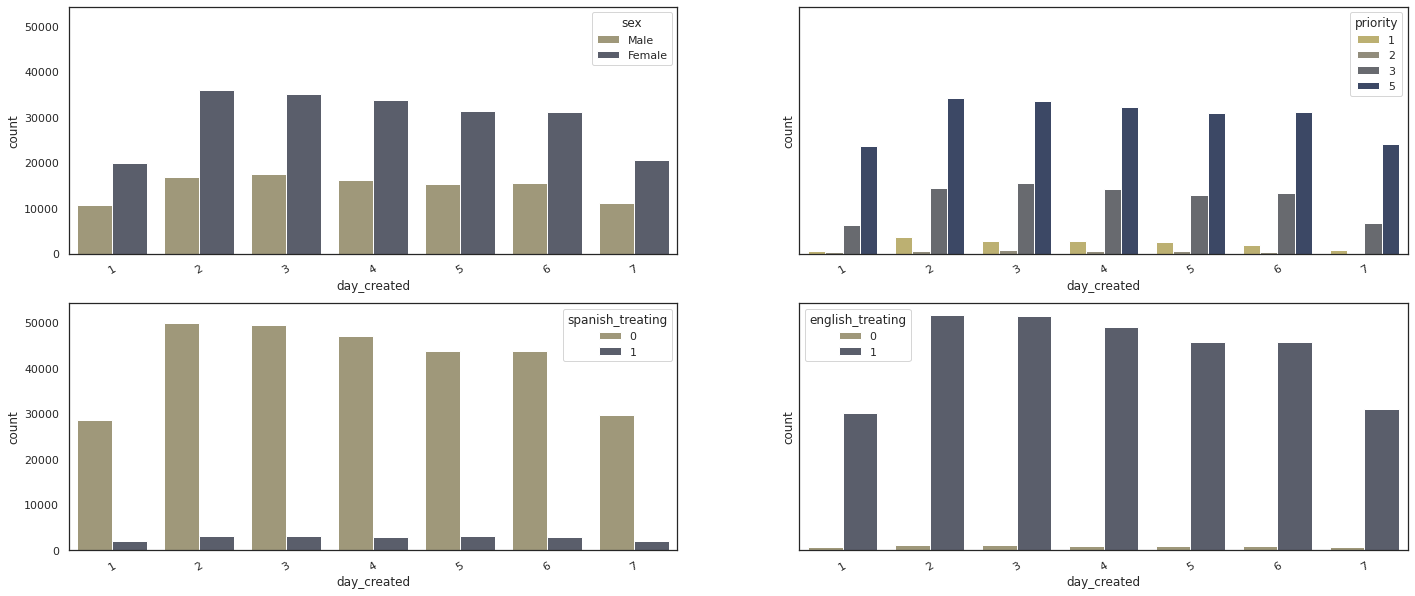

In [ ]:
countplot4('day_created','sex', 'priority', 'spanish_treating', 'english_treating',train)

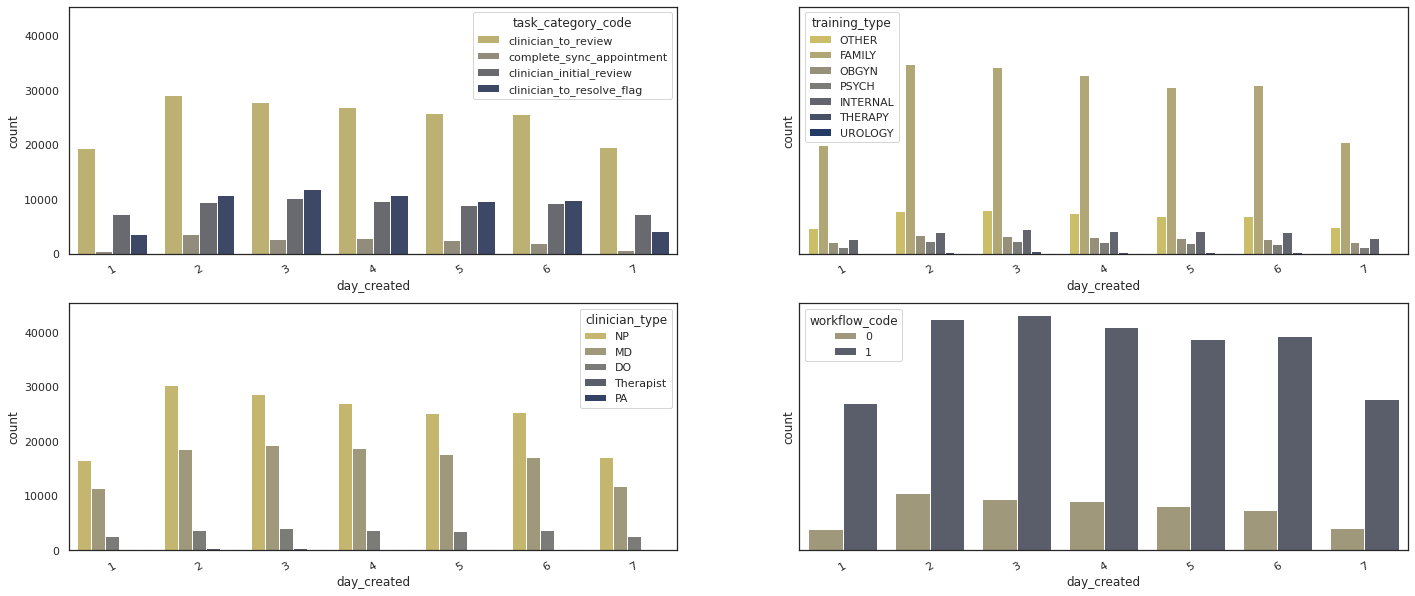

In [ ]:
countplot4('day_created','task_category_code','training_type','clinician_type','workflow_code',train)

###Target Distribution
Our target feature is a bit imbalanced with 60% of records having target equal to 1.

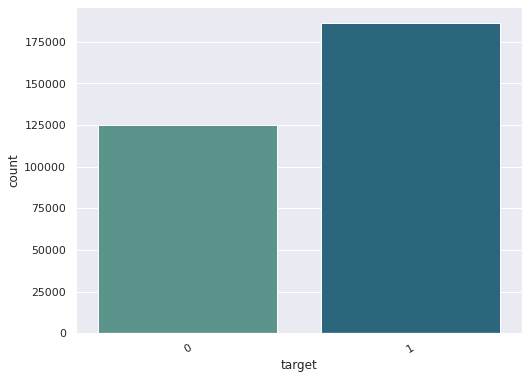

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
countplot('target',None)

From the following distribution plots we can see that the only categorical feature level that has a larger count of the target being equal to 0 is clinician_initial_review within task_category_code.

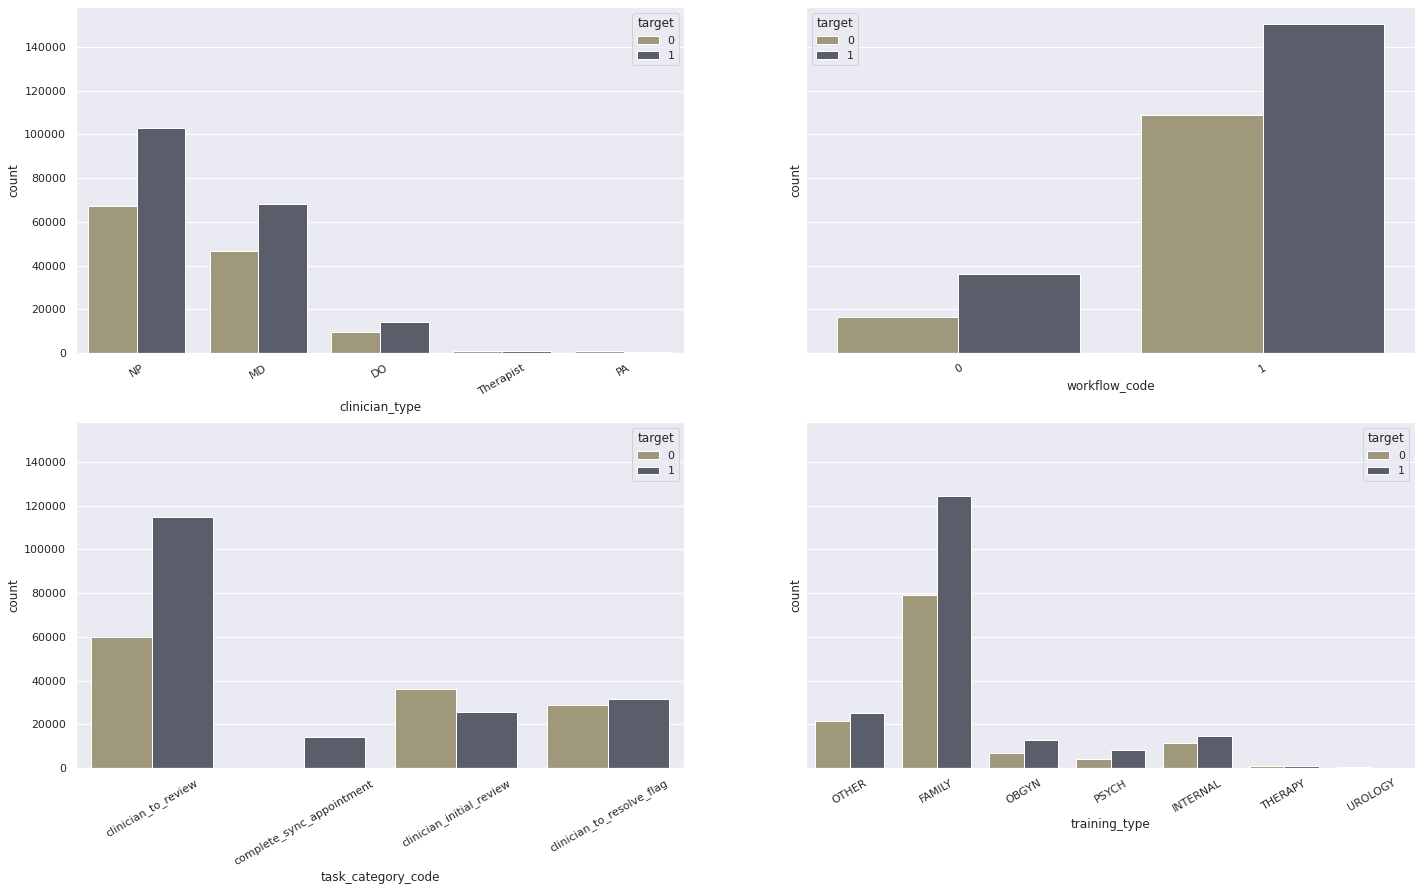

In [ ]:
countplot4t('clinician_type','workflow_code','task_category_code','training_type','target')

It can also be noted that the target distribution is almost equal when task priority is 3.

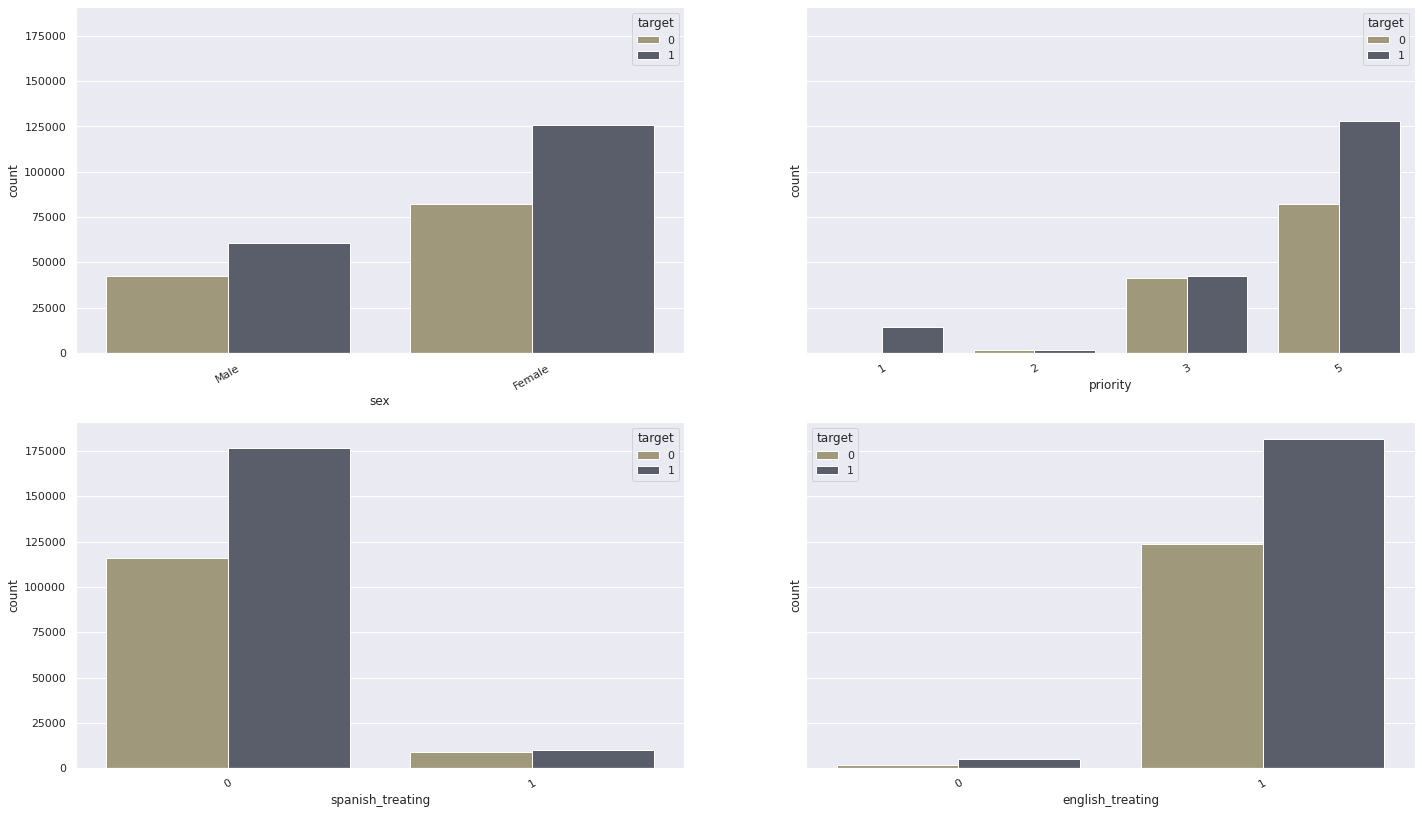

In [ ]:
countplot4t('sex', 'priority', 'spanish_treating', 'english_treating','target')

At a glance, we can see both positive and negative correlation between some of our data.

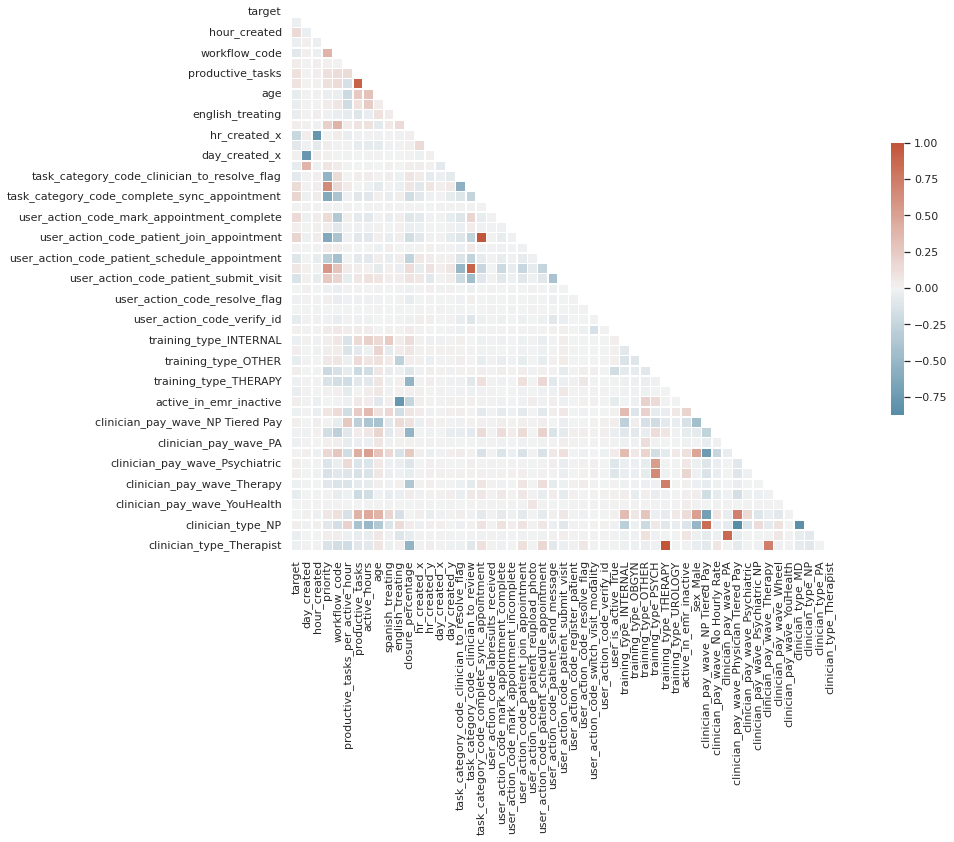

In [ ]:
t = train[['target','task_category_code', 'day_created', 'hour_created', 'priority',
      'user_action_code', 'user_is_active', 'workflow_code', 'productive_tasks_per_active_hour',
       'productive_tasks', 'active_hours', 'training_type', 'active_in_emr',
       'sex', 'age', 'spanish_treating', 'english_treating',
       'closure_percentage', 'clinician_pay_wave', 'clinician_type',
       'hr_created_x', 'hr_created_y',
       'day_created_x', 'day_created_y']]
t = pd.DataFrame(pd.get_dummies(t,drop_first=True))
sns_heatmap(t)

##Summary of Exploratory Data Analysis


* Features that can't or shouldn't be used in modeling will need to be dropped.
  * Data being fed into the final model will not have information surrounding task completion (Completed by Clinician ID, Completed Date/Day/Hour, Elapsed Hours).
  * Unique IDs, such as task id and locked_to_clinician_id, should not be used in modeling.
  * Duplicated information or overlapping information.
* Feature important should be considered and can be done using Random Forest algorithm built-in feature importance function.
* Our target variable is a slightly imbalanced (60/40). This may need to be addressed during model development.
* Scaling and/or Normalizing will need to be done for skewed data. Our different models may require handling skewed data differently.
* More consideration should be given to outliers.
* One-Hot Encoding of categorical features will need to be done for some of our models.
* Selected models are Neural Network, SVM, and Random Forest Tree.


#Note on Data Ethics and Security

The data being used for this project is private data which means there are security and privacy concerns attached to it. This type of data is used for internal analysis. In order to protect our customers and patients absolutely no patient data will be used for analysis or modeling. Additionally clinicians have been given unique anonymized IDs. 